In [19]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

In [5]:
 # download the dataset from Kaggle
!kaggle datasets download -d mlg-ulb/creditcardfraud -p ../Data

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud


  0%|          | 0.00/66.0M [00:00<?, ?B/s]
  2%|1         | 1.00M/66.0M [00:05<05:30, 206kB/s]
  3%|3         | 2.00M/66.0M [00:08<04:32, 246kB/s]
  5%|4         | 3.00M/66.0M [00:13<04:29, 245kB/s]
  6%|6         | 4.00M/66.0M [00:17<04:29, 241kB/s]
  8%|7         | 5.00M/66.0M [00:21<04:20, 245kB/s]
  9%|9         | 6.00M/66.0M [00:26<04:17, 244kB/s]
 11%|#         | 7.00M/66.0M [00:30<04:20, 237kB/s]
 12%|#2        | 8.00M/66.0M [00:34<04:10, 243kB/s]
 14%|#3        | 9.00M/66.0M [00:39<04:07, 241kB/s]
 15%|#5        | 10.0M/66.0M [00:43<04:04, 240kB/s]
 17%|#6        | 11.0M/66.0M [00:47<04:00, 240kB/s]
 18%|#8        | 12.0M/66.0M [00:52<03:53, 243kB/s]
 20%|#9        | 13.0M/66.0M [00:56<03:49, 242kB/s]
 21%|##1       | 14.0M/66.0M [01:00<03:42, 245kB/s]
 23%|##2       | 15.0M/66.0M [01:05<03:39, 244kB/s]
 24%|##4       | 16.0M/66.0M [01:09<03:34, 244kB/s]
 26%|##5       | 17.0M/66.0M [01:13<03:30, 243kB/s]
 27%|##7       | 18.0M/66.0M [01:18<03:30, 239kB/s]
 29%|##8       | 19


License(s): DbCL-1.0



In [6]:
# unzip the dataset
!unzip ../Data/creditcardfraud.zip -d ../Data

Archive:  ../Data/creditcardfraud.zip
  inflating: ../Data/creditcard.csv  


In [7]:
creditcard = pd.read_csv("../Data/creditcard.csv")
creditcard

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<Axes: >

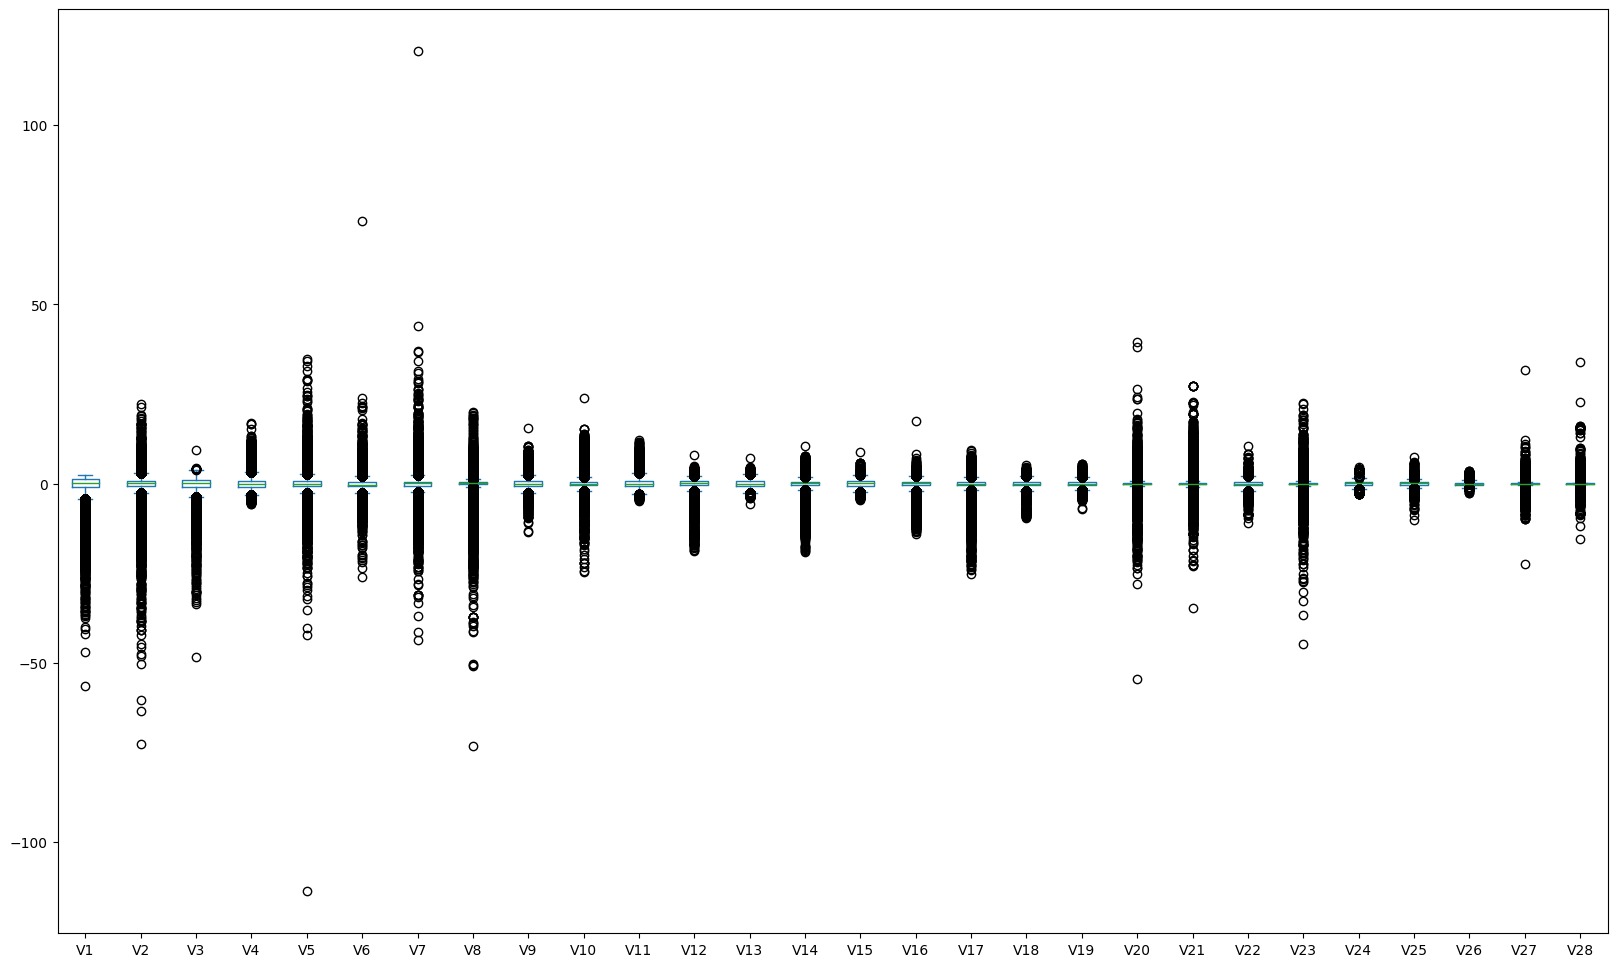

In [8]:
fig, ax = plt.subplots(figsize = (20, 12))
creditcard.loc[:, 'V1':'V28'].plot(kind = 'box', ax = ax)

In [9]:
# a function to identify outliers in a DataFrame using the Interquartile Range (IQR)
# removes these outliers from the specified subset of the DataFrame that contains non-fraudulent transactions (Class = 0)

def cap_data(df):
    indexes = []
    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:
            V_quartile_1 = np.quantile(df[col], 0.25)
            V_quartile_3 = np.quantile(df[col], 0.75)
            V_IQR = V_quartile_3 - V_quartile_1
            V_lowerbound = V_quartile_1 - (1.5 * V_IQR)
            V_upperbound = V_quartile_3 + (1.5 * V_IQR)
            outliers = df[(df[col] < V_lowerbound) | (df[col] > V_upperbound)].index
            indexes.extend(outliers)
    return list(set(indexes))

idx = cap_data(creditcard.loc[creditcard.Class == 0, 'V1':'V28'])
creditcard = creditcard.loc[~creditcard.index.isin(idx)]

In [10]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(creditcard.drop(columns = ['Class']), 
                                                    creditcard['Class'], 
                                                    test_size = 0.2)

In [14]:
# standard scaling
features = X_train.columns.tolist()

std_scaler = StandardScaler()
X_train[features] = X_train[features].astype('float64')
X_test[features] = X_test[features].astype('float64')

X_train[features] = std_scaler.fit_transform(X_train[features])
X_test[features]  = std_scaler.transform(X_test[features])

X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
8238,-1.804527,0.413780,-0.041216,0.603202,0.162004,-0.662858,-0.209503,-0.605752,-0.194301,1.681368,...,-0.007458,0.045511,0.356725,-0.140871,0.703107,0.369452,2.353131,-0.788642,-0.179016,-0.475371
13532,-1.527545,0.388718,0.358178,0.243547,0.642141,0.078519,0.177151,-0.272204,0.033994,1.376123,...,-0.613867,-1.044422,-1.219887,0.752944,-0.202236,0.085564,0.195619,-0.422486,-0.024431,-0.661599
87683,-0.719274,-0.793761,1.537107,1.215049,1.547023,0.792264,0.361775,0.920344,-0.055604,-1.391425,...,-0.054544,-0.531178,-0.970495,-0.401762,-0.337861,-0.418002,-0.600877,0.230818,0.630270,-0.643058
109032,-0.518275,-1.117504,1.462315,0.514518,-0.148302,0.341771,0.487136,0.226606,1.281811,-0.828645,...,0.292540,-0.405143,-0.735647,0.130553,-0.695304,-0.519290,0.277508,0.851663,0.100705,-0.546672
87301,-0.722846,-1.074632,0.657379,1.314067,-0.353229,0.510018,0.796014,0.507910,0.527856,-0.099079,...,-0.570841,0.325986,0.610142,-1.190315,0.134821,0.033776,0.692859,0.392438,0.920098,-0.665552
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81322,-0.781374,0.695404,-1.192164,-0.095569,-1.569675,-0.878022,0.486570,-1.213358,-0.102211,-2.152086,...,-1.061735,-0.660254,-0.441596,-0.540497,-1.669967,1.137515,-0.311257,0.068210,-0.154899,-0.542855
68017,-0.911715,0.428590,-0.214628,0.263858,-0.237012,-0.520204,-0.224151,-0.368937,-0.009445,0.326724,...,0.107852,-0.213024,-0.496718,0.135348,0.093196,0.190462,2.110853,-0.715401,-0.150674,-0.375850
40204,-1.182536,0.276730,-1.048441,-0.065620,-0.562050,-0.948574,-1.028617,-0.005603,-0.552461,-1.437602,...,2.138424,-0.012975,-0.950082,-0.069114,0.987361,0.460328,-1.291407,-0.506329,0.304402,1.897463
126037,-0.374565,0.328495,-0.698510,1.077214,0.983837,-1.269656,1.555462,-1.206350,0.567437,2.082162,...,0.074425,-0.244956,0.262510,-0.712374,-0.050279,1.033616,1.206296,0.254823,0.205896,-0.132499


In [16]:
# finding the best hyperparameters using the grid search algorithm
# training the model with the best params
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
              'degree': [1, 2, 3]}

model = SVC()

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, verbose = 3)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_ 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ....C=0.1, degree=1, kernel=linear;, score=1.000 total time=   2.7s
[CV 2/5] END ....C=0.1, degree=1, kernel=linear;, score=1.000 total time=   2.3s
[CV 3/5] END ....C=0.1, degree=1, kernel=linear;, score=1.000 total time=   2.2s
[CV 4/5] END ....C=0.1, degree=1, kernel=linear;, score=1.000 total time=   2.4s
[CV 5/5] END ....C=0.1, degree=1, kernel=linear;, score=1.000 total time=   2.4s
[CV 1/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.998 total time=  15.1s
[CV 2/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.998 total time=  14.9s
[CV 3/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.998 total time=  15.1s
[CV 4/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.998 total time=  13.9s
[CV 5/5] END .......C=0.1, degree=1, kernel=rbf;, score=0.998 total time=  14.1s
[CV 1/5] END ......C=0.1, degree=1, kernel=poly;, score=1.000 total time=   2.0s
[CV 2/5] END ......C=0.1, degree=1, kernel=poly

In [18]:
# predicting on the train and test sets
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [20]:
# model evaluatation 
f1_train = f1_score(y_train, y_train_pred, average = 'weighted')
f1_test = f1_score(y_test, y_test_pred, average = 'weighted')

print("f1 Score on Training Set:", f1_train)
print("f1 Score on Test Set:", f1_test)

f1 Score on Training Set: 0.999837859759108
f1 Score on Test Set: 0.9996043499790664
